In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
#importing Some libraries
import os
import numpy as np
import pandas as pd
import random as rn

import tensorflow as tf
import keras


from tensorflow.keras.models import Sequential,Model,load_model
from tensorflow.keras.layers import Input,Dense,Conv2D,MaxPool2D,Activation,Flatten
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
from tensorflow.keras import regularizers
import datetime


2026-01-27 17:31:33.296868: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1769535093.492647      55 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1769535093.550306      55 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1769535094.012908      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1769535094.012980      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1769535094.012983      55 computation_placer.cc:177] computation placer alr

In [ ]:
dir_path='/kaggle/input/rvlcdip'
os.listdir(dir_path)       #Os will look inside the folder and provide me the names of every file and sub-folder found there

['labels_final.csv', 'data_final']

In [ ]:
train_df=pd.read_csv('/kaggle/input/rvlcdip/labels_final.csv')
train_df.head()

,path,label
0,imagesv/v/o/h/voh71d00/509132755+-2755.tif,3
1,imagesl/l/x/t/lxt19d00/502213303.tif,3
2,imagesx/x/e/d/xed05a00/2075325674.tif,2
3,imageso/o/j/b/ojb60d00/517511301+-1301.tif,3
4,imagesq/q/z/k/qzk17e00/2031320195.tif,7


In [ ]:
# We have the path of the images that are present in the directory(data_fianl) in csv format
train_df['path'].head()

0    imagesv/v/o/h/voh71d00/509132755+-2755.tif
1          imagesl/l/x/t/lxt19d00/502213303.tif
2         imagesx/x/e/d/xed05a00/2075325674.tif
3    imageso/o/j/b/ojb60d00/517511301+-1301.tif
4         imagesq/q/z/k/qzk17e00/2031320195.tif
Name: path, dtype: object

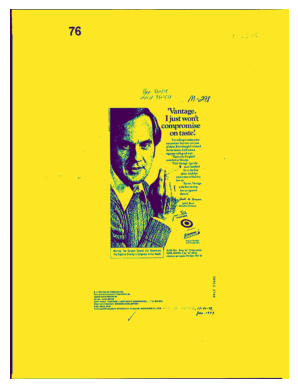

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

#Load and display a .tif image
image_path='/kaggle/input/rvlcdip/data_final/imagesv/v/o/h/voh71d00/509132755+-2755.tif'
image2_path='/kaggle/input/rvlcdip/data_final/imagesl/l/x/t/lxt19d00/502213303.tif'
image=Image.open(image_path)
image2=Image.open(image2_path)

plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
image.size,image2.size

((754, 1000), (774, 1000))

In [ ]:
# So we have the images of different sizes

In [ ]:
train_df.shape

(48000, 2)

In [ ]:
train_df.label.value_counts()

label
0     3016
13    3007
14    3006
12    3006
3     3005
8     3003
9     3002
10    3002
7     3000
5     2999
15    2996
1     2994
4     2994
2     2993
11    2992
6     2985
Name: count, dtype: int64

In [ ]:
# So we almost have equal no. of images of each of the 16 classes but we have less no. of images of each class so we will use data augmentation technique to generate more data

In [ ]:
train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,#will randomly rotate the image either to left or right by 10 degrees
    width_shift_range=0.1,# slide the image sideways by 10 percent
    height_shift_range=0.1,# slide the image up/down by 10 percent
    shear_range=0.1,# will distort the image
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

In [ ]:
#now we will load the image in batches
train_generator=train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory='/kaggle/input/rvlcdip/data_final',
    x_col='path',
    y_col='label',
    subset ='training',
    batch_size=100,
    seed=42,
    shuffle='True',
    class_mode='raw',
    target_size=(255,255)
)
validation_generator=train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory='/kaggle/input/rvlcdip/data_final',
    x_col='path',
    y_col='label',
    subset ='validation',
    batch_size=100,
    seed=42,
    shuffle='True',
    class_mode='raw',
    target_size=(255,255)
)

Found 38400 validated image filenames.
Found 9600 validated image filenames.


"""

Here we still have total 48000 images only because it does not make copies it will do transformation on the go during training
like during epoch 1 model will get a image and rotate it and train on it and during epoch when the model
will get the same image it will do some other transformation like it will shift the image sideways and this is
how it does data-augmentation and not making copies and saving it on hard drives
"""

In [ ]:
model=Sequential([
    #Layer1
    Conv2D(32,(3,3),activation='relu',input_shape=(255,255,3)),
    MaxPool2D(pool_size=(2,2),strides=2),

    #Layer2
    Conv2D(64,(3,3),activation='relu'),
    MaxPool2D(pool_size=(2,2),strides=2),

    #Layer3

    Conv2D(128,(3,3),activation='relu'),
    MaxPool2D(pool_size=(2,2),strides=2),



    #Flatten Layer
    Flatten(),

    #FullyConnectedLayer
    Dense(128,activation='relu'),
    Dense(64,activation='relu'),
    Dense(16,activation='softmax') # 16 classes
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1769535400.922192      55 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 253, 253, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 126, 126, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 124, 124, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │         1,040 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,272 (56.64 MB)

 Trainable params: 14,848,272 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

checkpoint_path='/kaggle/working/model_checkpoints/weights.{epoch:02d}-{val_loss:.2f}.keras'
# we are using this type of naming of our file so that our current best model wts do not overwrite the previous best one
# weights.03-0.54.keras the model will be saved in a path something like this which tells epoch 3 has val_loss 0.54 and it will save the wts of the model
log_dir='/kaggle/working/logs/fit'+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
model_checkpoint=ModelCheckpoint(filepath=checkpoint_path,
                                save_best_only=True,# will save the model only if it outperform the previous saved model
                                monitor='val_loss',
                                mode='min',# when the val_loss decreases the model will be saved
                                verbose=1)
reduce_lr=ReduceLROnPlateau(monitor='val_loss',patience=3,min_lr=0.0001)
"""
we start with a higher lr and it will monitor the performance of our model when the val_loss is decreasing
it's okay when it will not for 3 epochs in a row it will reduce lr so that our model converge better and
does not overshoot.
"""
early_stop=EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)
"""
It will monitor the training process if the val_loss does not go down for 5 epochs in a row it will just kill the
training proces and will retrieve the best model from saved models.
"""




callbacks=[model_checkpoint,reduce_lr,early_stop]

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history=model.fit(train_generator,
         validation_data=validation_generator,
         epochs=50,
         callbacks=callbacks)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50


I0000 00:00:1769535410.314145     101 service.cc:152] XLA service 0x7cc50c003a80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1769535410.314189     101 service.cc:160]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1769535410.729064     101 cuda_dnn.cc:529] Loaded cuDNN version 91002
2026-01-27 17:36:57.482831: E external/local_xla/xla/service/slow_operation_alarm.cc:73] Trying algorithm eng0{} for conv %cudnn-conv-bw-filter.4 = (f32[64,32,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[100,32,126,126]{3,2,1,0} %bitcast.3227, f32[100,64,124,124]{3,2,1,0} %bitcast.3291), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", metadata={op_type="Conv2DBackpropFilter" op_name="gradient_tape/sequential_1/conv2d_1_2/convolution/Conv2DBackpropFilter" source_file="/usr/local/lib/python3.12/dist-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_co

  1/384 ━━━━━━━━━━━━━━━━━━━━ 1:25:13 13s/step - accuracy: 0.0800 - loss: 2.7740

I0000 00:00:1769535419.686614     101 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


384/384 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2245 - loss: 2.5893
Epoch 1: val_loss improved from inf to 1.80347, saving model to /kaggle/working/model_checkpoints/weights.01-1.80.keras
384/384 ━━━━━━━━━━━━━━━━━━━━ 1174s 3s/step - accuracy: 0.2247 - loss: 2.5883 - val_accuracy: 0.4381 - val_loss: 1.8035 - learning_rate: 0.0010
Epoch 2/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4496 - loss: 1.7511
Epoch 2: val_loss improved from 1.80347 to 1.51479, saving model to /kaggle/working/model_checkpoints/weights.02-1.51.keras
384/384 ━━━━━━━━━━━━━━━━━━━━ 893s 2s/step - accuracy: 0.4496 - loss: 1.7509 - val_accuracy: 0.5281 - val_loss: 1.5148 - learning_rate: 0.0010
Epoch 3/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5390 - loss: 1.5013
Epoch 3: val_loss improved from 1.51479 to 1.45711, saving model to /kaggle/working/model_checkpoints/weights.03-1.46.keras
384/384 ━━━━━━━━━━━━━━━━━━━━ 882s 2s/step - accuracy: 0.5390 - loss: 1.5012 - val_accuracy: 0.5454 - va

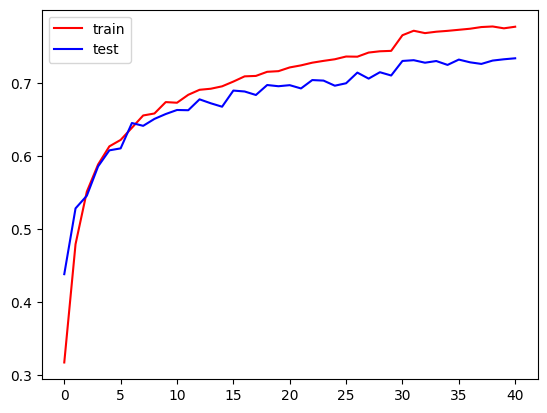

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='test')
plt.legend()
plt.show()

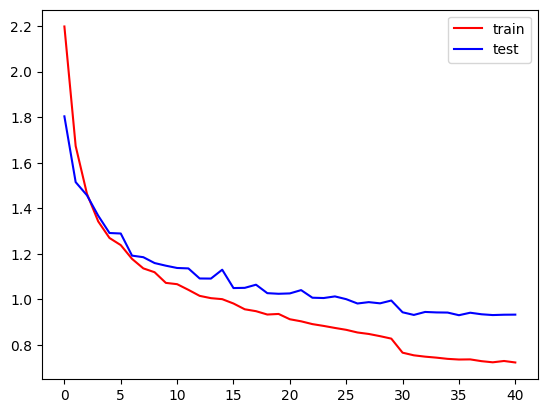

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='test')
plt.legend()
plt.show()